In [212]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import pandas as pd
data=pd.read_csv("ShipmentTracking.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2

In [2]:
data.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
data.shape

(10999, 12)

In [4]:
data3=data
data=data.drop(["ID"],axis=1)
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [5]:
#shape
data.shape

(10999, 11)

In [6]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
data=data.rename(columns={"Reached.on.Time_Y.N":"Reached_on_time"})

In [8]:
categorical_columns = data.select_dtypes(include = "object")

In [9]:
data.Reached_on_time.value_counts()

Reached_on_time
1    6563
0    4436
Name: count, dtype: int64

In [10]:
#Checking Data types
data.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached_on_time         int64
dtype: object

# Visualization

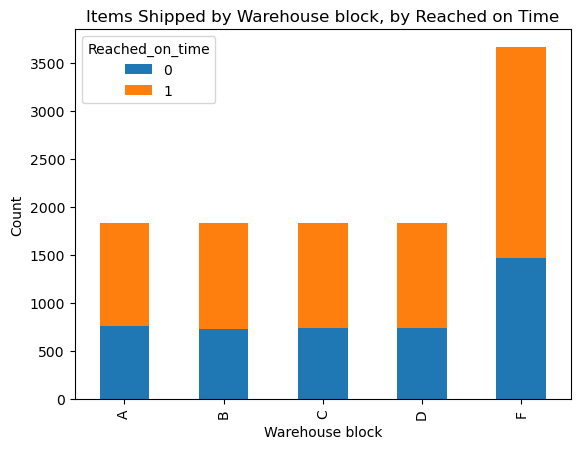

In [11]:
grouped = data.groupby(['Warehouse_block', 'Reached_on_time']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Warehouse block')
plt.ylabel('Count')
plt.title('Items Shipped by Warehouse block, by Reached on Time')
plt.show()

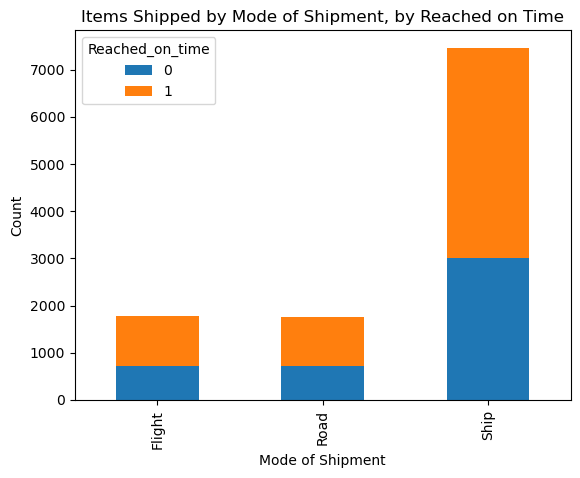

In [12]:
 grouped = data.groupby(['Mode_of_Shipment', 'Reached_on_time']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()

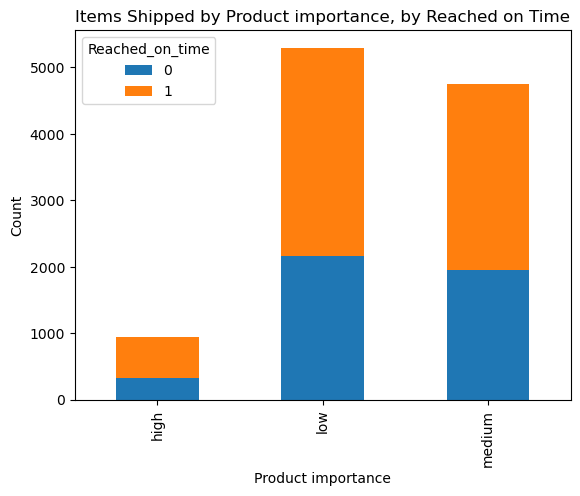

In [13]:
grouped = data.groupby(['Product_importance', 'Reached_on_time']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Product importance')
plt.ylabel('Count')
plt.title('Items Shipped by Product importance, by Reached on Time')
plt.show()

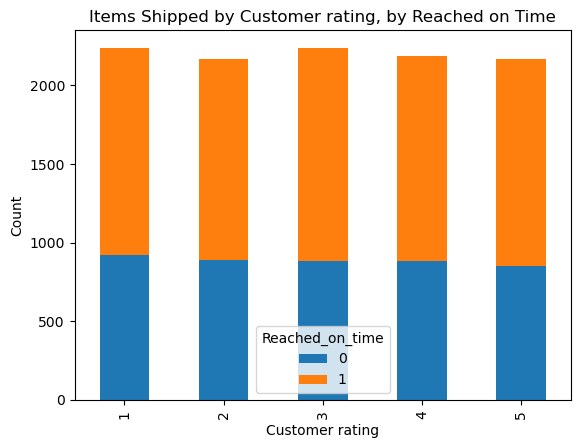

In [14]:
grouped = data.groupby(['Customer_rating', 'Reached_on_time']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Customer rating')
plt.ylabel('Count')
plt.title('Items Shipped by Customer rating, by Reached on Time')
plt.show()

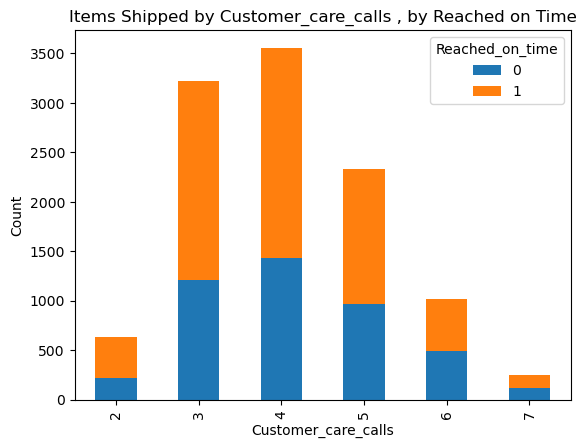

In [15]:
grouped = data.groupby(['Customer_care_calls', 'Reached_on_time']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Customer_care_calls')
plt.ylabel('Count')
plt.title('Items Shipped by Customer_care_calls , by Reached on Time')
plt.show()

<Axes: title={'center': 'On Time Delivery Compared to Product Weight'}, xlabel='Reached_on_time', ylabel='Weight_in_gms'>

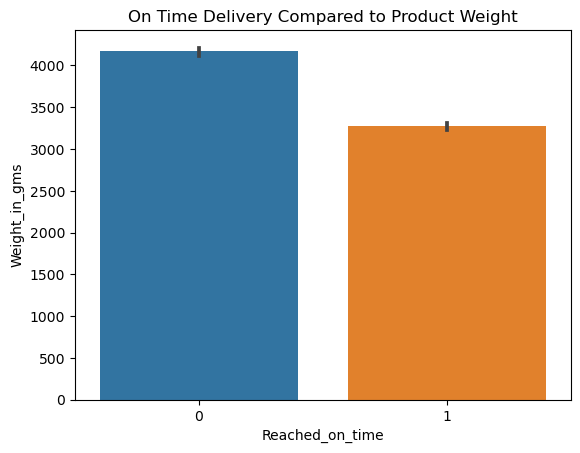

In [16]:
plt.title('On Time Delivery Compared to Product Weight')
sns.barplot(x='Reached_on_time',y='Weight_in_gms', data=data)

<Axes: title={'center': 'On Time Delivery Compared to Product Weight'}, xlabel='Reached_on_time', ylabel='Discount_offered'>

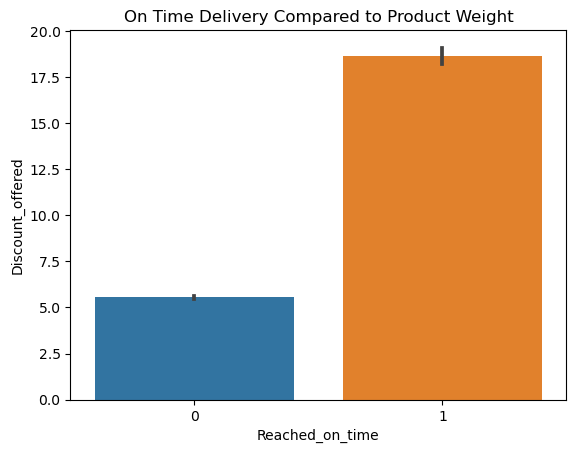

In [17]:
plt.title('On Time Delivery Compared to Product Weight')
sns.barplot(x='Reached_on_time',y='Discount_offered', data=data)

In [18]:
data.Reached_on_time.value_counts()

Reached_on_time
1    6563
0    4436
Name: count, dtype: int64

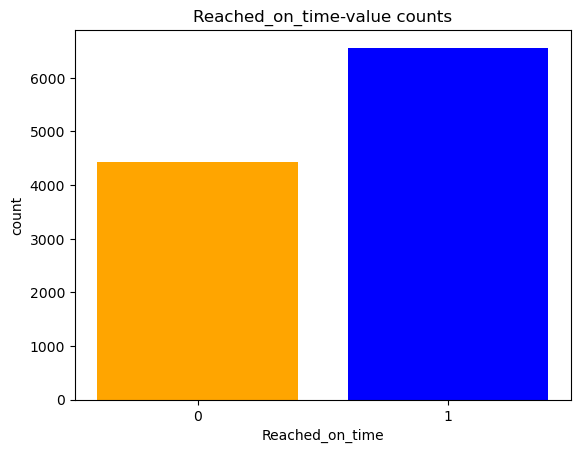

In [19]:
counts=data.Reached_on_time.value_counts()
colors=['blue','orange']
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Reached_on_time')
plt.ylabel('count')
plt.title('Reached_on_time-value counts')
plt.xticks([0,1],['0','1'])
plt.show()

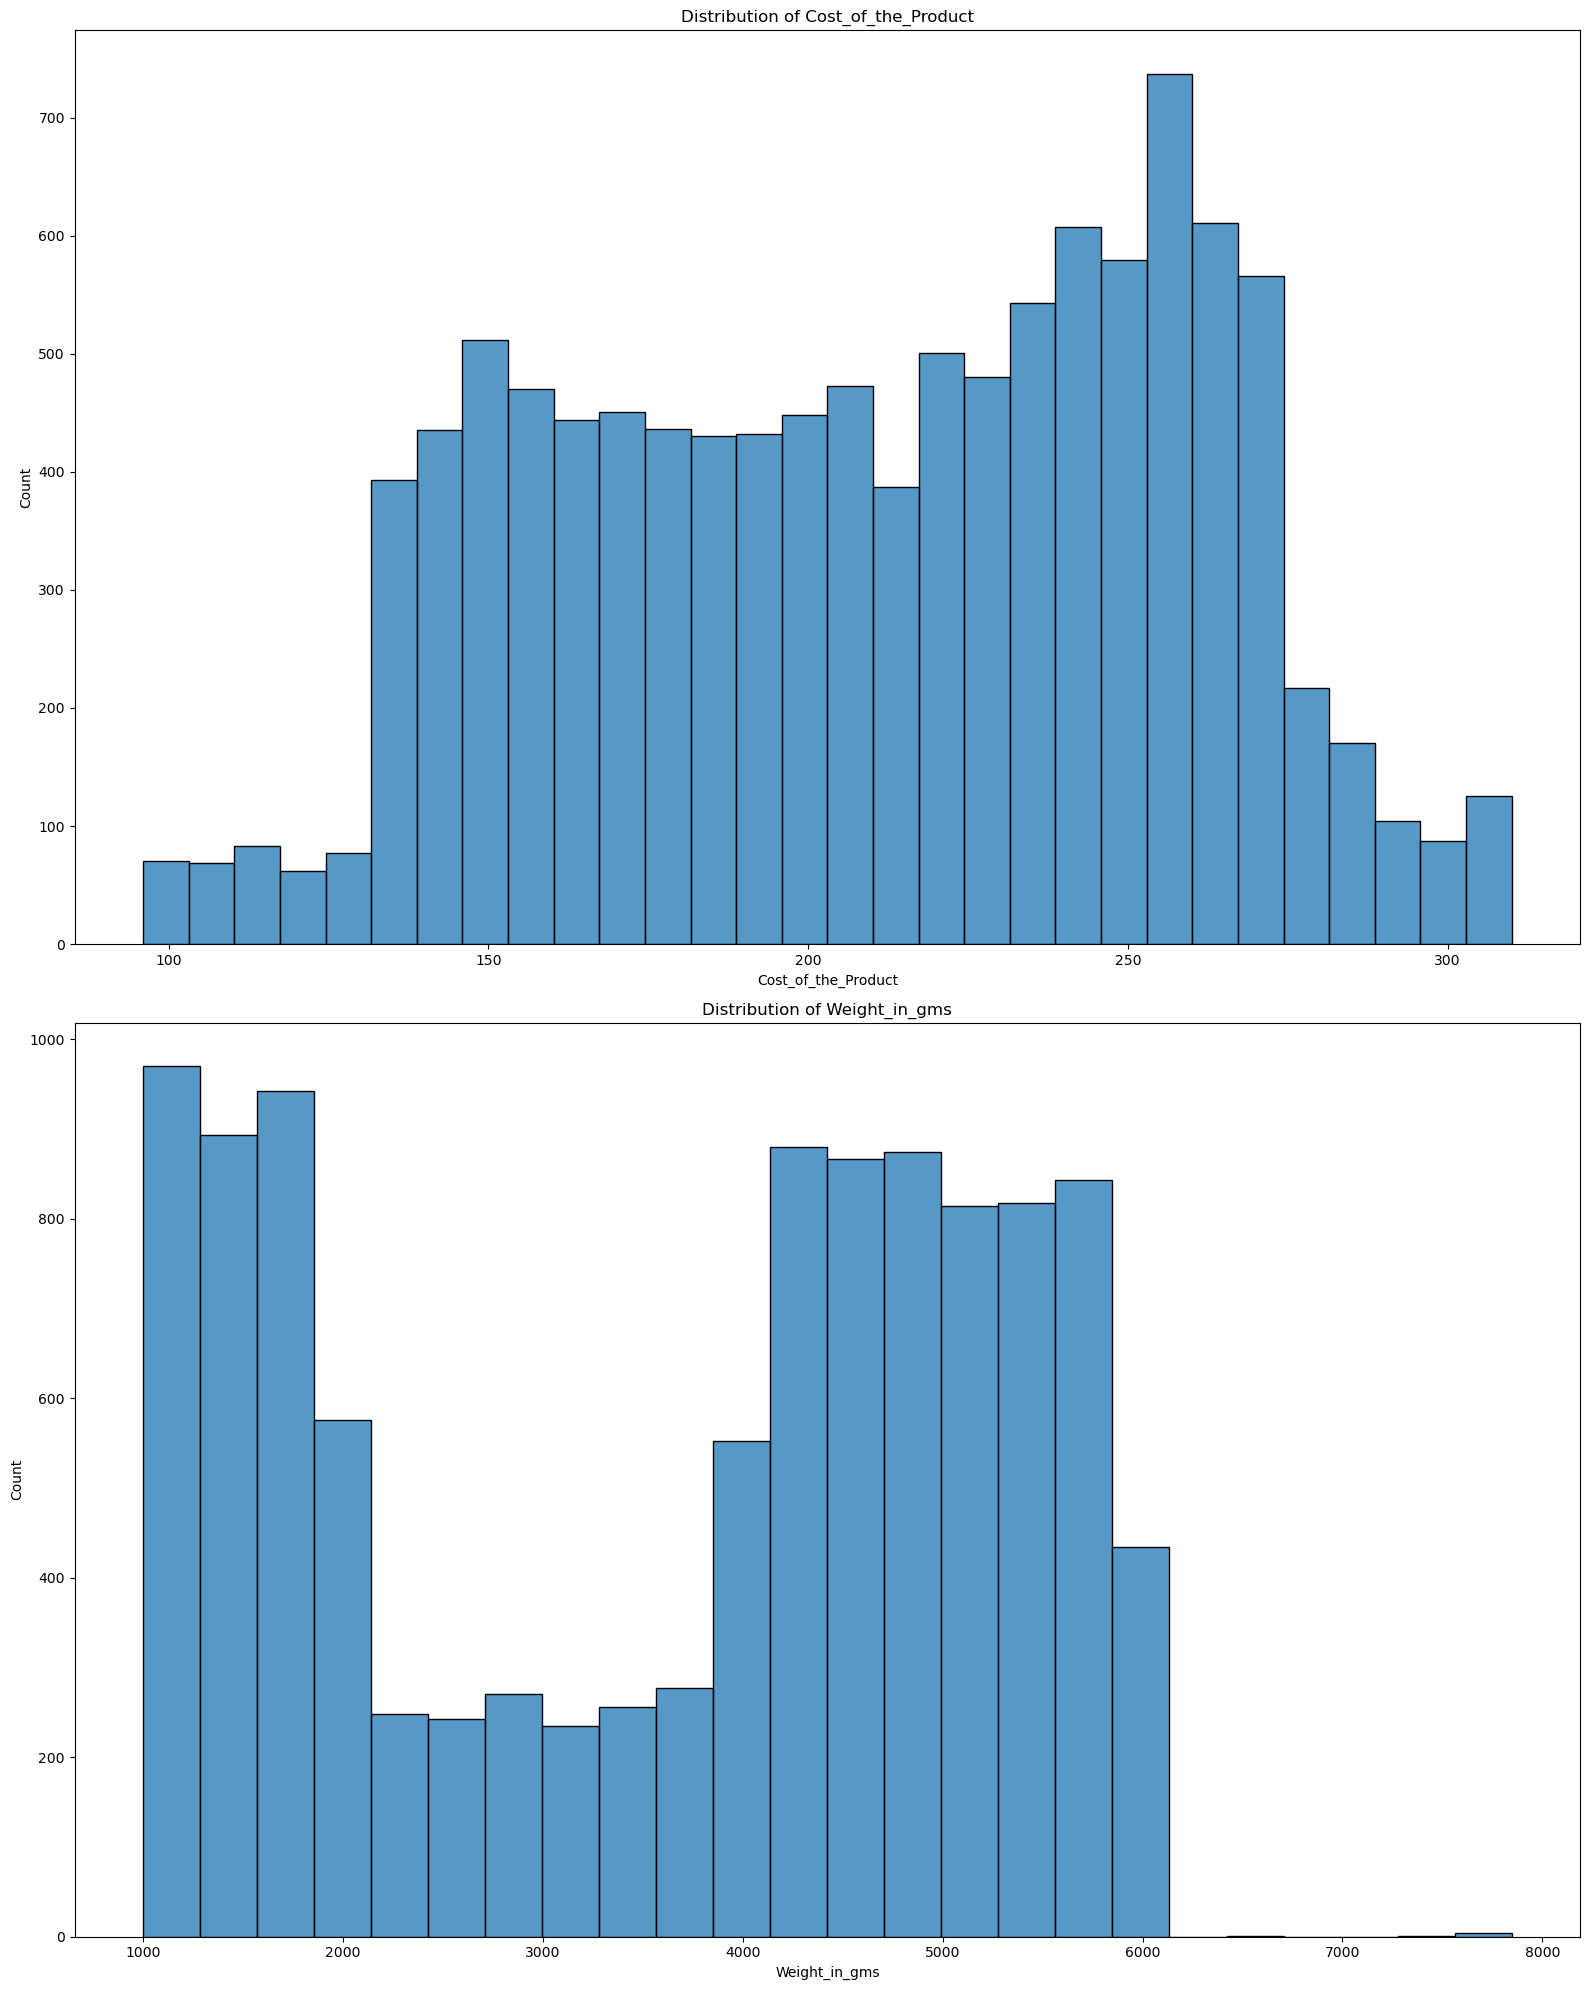

In [20]:
cont_cols = ['Cost_of_the_Product', 'Weight_in_gms']
plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cont_cols)):
        ax = plt.subplot(2, 1, plotnumber)
        sns.histplot(x = cont_cols[i], data = data, ax = ax)
        plt.title(f'Distribution of {cont_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
#Checking number of null values in each colum
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [22]:
data.Warehouse_block=le.fit_transform(data.Warehouse_block)
data.Mode_of_Shipment=le.fit_transform(data.Mode_of_Shipment)
data.Product_importance=le.fit_transform(data.Product_importance)
data.Gender=le.fit_transform(data.Gender)

In [23]:
data.dtypes
#Now all the columns converted into numerical data type

Warehouse_block        int32
Mode_of_Shipment       int32
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int32
Gender                 int32
Discount_offered       int64
Weight_in_gms          int64
Reached_on_time        int64
dtype: object

In [24]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8799, 10), (2200, 10), (8799,), (2200,))

# Logistic Regression

In [27]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [28]:
lg_p=lg.predict(x_test)
lg_p

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [29]:
pred_prob=lg.predict_proba(x_test)
pred_prob

array([[0.00728156, 0.99271844],
       [0.44785877, 0.55214123],
       [0.52241432, 0.47758568],
       ...,
       [0.37592817, 0.62407183],
       [0.57462528, 0.42537472],
       [0.00182782, 0.99817218]])

In [30]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[496, 428],
       [411, 865]], dtype=int64)

In [31]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

61.86363636363637

In [32]:
lg_tpr=0.54
lg_fpr=0.33
lg_sp=0.66
lg_pr=0.53
lg_f1=0.56

In [33]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54       924
           1       0.67      0.68      0.67      1276

    accuracy                           0.62      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.62      0.62      0.62      2200



In [34]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.007282,0.992718
1,0.447859,0.552141
2,0.522414,0.477586
3,0.519405,0.480595
4,0.050600,0.949400
...,...,...
2195,0.508328,0.491672
2196,0.647996,0.352004
2197,0.375928,0.624072
2198,0.574625,0.425375


In [35]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])
fpr

array([0.        , 0.        , 0.        , 0.00110254, 0.00110254,
       0.00330761, 0.00330761, 0.00441014, 0.00441014, 0.00771775,
       0.00771775, 0.00882029, 0.00882029, 0.01212789, 0.01212789,
       0.01323043, 0.01323043, 0.02315325, 0.02315325, 0.02425579,
       0.02425579, 0.02535832, 0.02535832, 0.02646086, 0.02646086,
       0.02866593, 0.02866593, 0.02976847, 0.02976847, 0.03197354,
       0.03197354, 0.03528115, 0.03528115, 0.03748622, 0.03748622,
       0.03858875, 0.03858875, 0.03969129, 0.03969129, 0.04079383,
       0.04079383, 0.0429989 , 0.0429989 , 0.04520397, 0.04520397,
       0.04851158, 0.04851158, 0.05071665, 0.05071665, 0.05402426,
       0.05402426, 0.0584344 , 0.0584344 , 0.05953693, 0.05953693,
       0.06174201, 0.06174201, 0.06284454, 0.06284454, 0.06394708,
       0.06394708, 0.06615215, 0.06615215, 0.06725469, 0.06725469,
       0.06945976, 0.06945976, 0.07166483, 0.07166483, 0.07276736,
       0.07276736, 0.07497244, 0.07497244, 0.08269019, 0.08269

In [36]:
tpr

array([0.00000000e+00, 7.73395205e-04, 4.02165507e-01, 4.02165507e-01,
       4.09899459e-01, 4.09899459e-01, 4.14539830e-01, 4.14539830e-01,
       4.18406806e-01, 4.18406806e-01, 4.19180201e-01, 4.19180201e-01,
       4.20726991e-01, 4.20726991e-01, 4.22273782e-01, 4.22273782e-01,
       4.23047177e-01, 4.23047177e-01, 4.24593968e-01, 4.24593968e-01,
       4.25367363e-01, 4.25367363e-01, 4.26914153e-01, 4.26914153e-01,
       4.27687548e-01, 4.27687548e-01, 4.28460944e-01, 4.28460944e-01,
       4.31554524e-01, 4.31554524e-01, 4.33101315e-01, 4.33101315e-01,
       4.33874710e-01, 4.33874710e-01, 4.34648105e-01, 4.34648105e-01,
       4.35421500e-01, 4.35421500e-01, 4.39288476e-01, 4.39288476e-01,
       4.40061872e-01, 4.40061872e-01, 4.41608662e-01, 4.41608662e-01,
       4.46249033e-01, 4.46249033e-01, 4.48569219e-01, 4.48569219e-01,
       4.49342614e-01, 4.49342614e-01, 4.50889404e-01, 4.50889404e-01,
       4.51662800e-01, 4.51662800e-01, 4.53209590e-01, 4.53209590e-01,
      

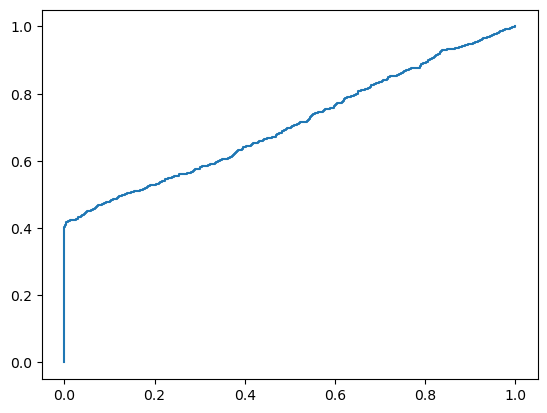

In [37]:
plt.plot(fpr,tpr)

In [38]:
precision,recall,threshold=precision_recall_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'PRC-CURVE')

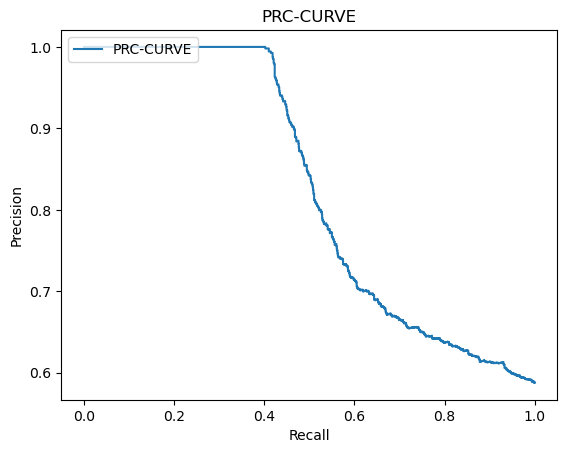

In [39]:
plt.plot(recall,precision,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Decision Tree

In [40]:
dt=DecisionTreeClassifier()

In [41]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dt_p=dt.predict(x_test)
dt_p

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
dt_m=confusion_matrix(dt_p,y_test)
dt_m

array([[491, 354],
       [416, 939]], dtype=int64)

In [44]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

65.0

In [45]:
dt_tpr=0.54
dt_fpr=0.3
dt_sp=0.71
dt_pr=0.57
dt_f1=0.60

In [46]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       845
           1       0.73      0.69      0.71      1355

    accuracy                           0.65      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.66      0.65      0.65      2200



In [47]:
roc1=roc_auc_score(dt_p,y_test)
roc1

0.6370270093233478

In [48]:
dt_df=pd.DataFrame(dt_p)
dt_df

,0
0,1
1,1
2,0
3,0
4,1
...,...
2195,0
2196,1
2197,0
2198,0


In [49]:
fpr,tpr,threshold=roc_curve(y_test,dt_df)

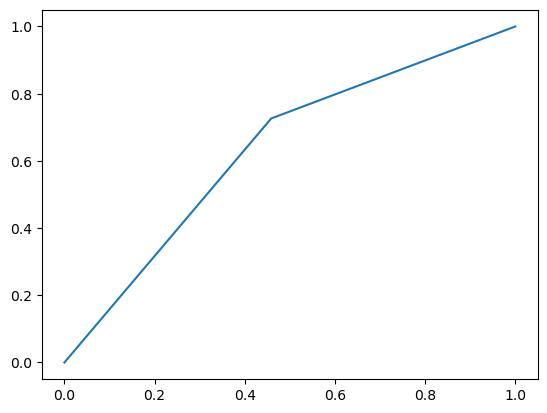

In [50]:
plt.plot(fpr,tpr)

In [51]:
precision,recall,threshold=precision_recall_curve(y_test,dt_df)
precision

array([0.58772727, 0.69298893, 1.        ])

Text(0.5, 1.0, 'PRC-CURVE')

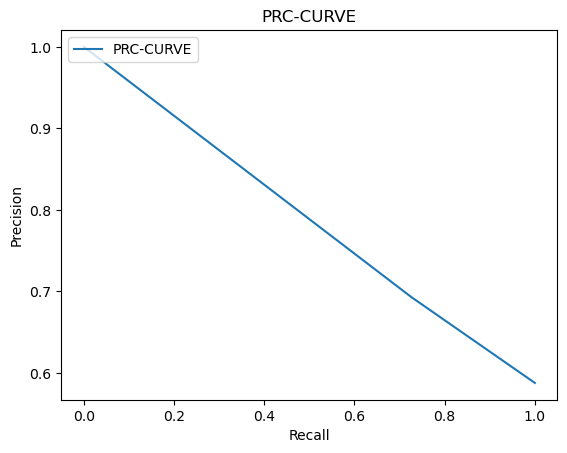

In [52]:
plt.plot(recall,precision,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Random Forest

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
rf_m=confusion_matrix(rf_p,y_test)
rf_m

array([[618, 457],
       [289, 836]], dtype=int64)

In [57]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

66.0909090909091

In [58]:
rf_tpr=0.68
rf_fpr=0.34
rf_sp=0.65
rf_pr=0.58
rf_f1=0.61

In [59]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62      1075
           1       0.65      0.74      0.69      1125

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.66      0.66      0.66      2200



# KNN

In [60]:
knn=KNeighborsClassifier()

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
knn_p=knn.predict(x_test)

In [63]:
knn_m=confusion_matrix(knn_p,y_test)
knn_m

array([[559, 403],
       [348, 890]], dtype=int64)

In [64]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

65.86363636363637

In [65]:
knn_tpr=0.616
knn_fpr=0.311
knn_sp=0.688
knn_pr=0.581
knn_f1=0.613

In [66]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       962
           1       0.69      0.72      0.70      1238

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



In [67]:
ls=list()

In [68]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p=knn.predict(x_test)
    c=confusion_matrix(p,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    ls.append(acc)

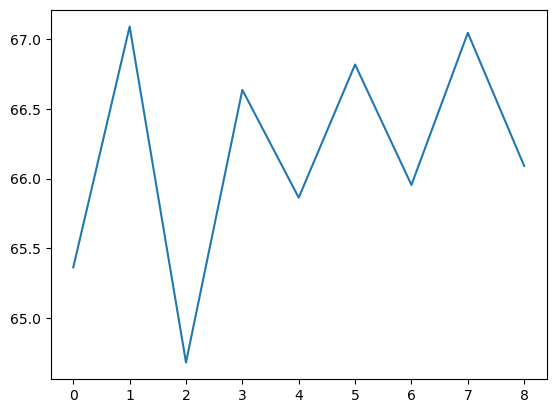

In [69]:
p1=plt.plot(ls)

# Naive bayes

In [70]:
nb=MultinomialNB()

In [71]:
nb.fit(x_train,y_train)

MultinomialNB()

In [72]:
nb_p=nb.predict(x_test)

In [73]:
nb_m=confusion_matrix(nb_p,y_test)
nb_m

array([[716, 525],
       [191, 768]], dtype=int64)

In [74]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

67.45454545454545

In [75]:
nb_tpr=0.789
nb_fpr=0.406
nb_sp=0.593
nb_pr=0.576
nb_f1=0.93

In [76]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1241
           1       0.59      0.80      0.68       959

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.70      0.67      0.67      2200



# SVM

In [77]:
svc=SVC()

In [78]:
svc.fit(x_train,y_train)

SVC()

In [79]:
svc_p=svc.predict(x_test)

In [80]:
svc_m=confusion_matrix(svc_p,y_test)
svc_m

array([[571, 401],
       [336, 892]], dtype=int64)

In [81]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

66.5

In [82]:
sv_tpr=0.63
sv_fpr=0.310
sv_sp=0.689
sv_pr=0.58
sv_f1=0.603

In [83]:
print(classification_report(svc_p,y_test))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       972
           1       0.69      0.73      0.71      1228

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.66      0.67      0.66      2200



# ADABOOST

In [84]:
adb=AdaBoostClassifier(n_estimators=50, random_state=42)

In [85]:
adb.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [86]:
adb_p=adb.predict(x_test)

In [87]:
adb_m=confusion_matrix(adb_p,y_test)
adb_m

array([[692, 484],
       [215, 809]], dtype=int64)

In [88]:
adb_acc=adb_m.diagonal().sum()/adb_m.sum()*100
adb_acc

68.22727272727272

In [89]:
adb_tpr=0.762
adb_fpr=0.374
adb_sp=0.625
adb_pr=0.588
adb_f1=0.663

In [90]:
print(classification_report(adb_p,y_test))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66      1176
           1       0.63      0.79      0.70      1024

    accuracy                           0.68      2200
   macro avg       0.69      0.69      0.68      2200
weighted avg       0.70      0.68      0.68      2200



# XG Boost

In [91]:
xgb_clf = XGBClassifier(n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1e-5,
    reg_lambda=1e-5,
    random_state=42
)

In [92]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [93]:
xgb_p = xgb_clf.predict(x_test)

In [94]:
xgb_m=confusion_matrix(xgb_p,y_test)
xgb_m

array([[674, 501],
       [233, 792]], dtype=int64)

In [95]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

66.63636363636364

In [96]:
xgb_tpr=0.
xgb_fpr=0.387
xgb_sp=0.612
xgb_pr=0.573
xgb_f1=0.647

In [97]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.74      0.57      0.65      1175
           1       0.61      0.77      0.68      1025

    accuracy                           0.67      2200
   macro avg       0.68      0.67      0.67      2200
weighted avg       0.68      0.67      0.66      2200



In [98]:
ls1=["Logistic","Decision_tree","Random_forest","KNN", "Naive_bayes","SVM","ADA BOOST","XG Boost"]
ls2=[lg_acc,dt_acc,rf_acc, knn_acc, nb_acc,svc_acc,adb_acc,xgb_acc]
ls3=[lg_tpr,dt_tpr,rf_tpr, knn_tpr, nb_tpr, sv_tpr,adb_tpr,xgb_tpr]
ls4=[lg_fpr,dt_fpr,rf_fpr, knn_fpr, nb_fpr, sv_fpr,adb_fpr,xgb_fpr]
ls5=[lg_sp,dt_sp,rf_sp, knn_sp, nb_sp, sv_sp,adb_sp,xgb_sp]
ls6=[lg_pr,dt_pr,rf_pr, knn_pr, nb_pr, sv_pr,adb_pr,xgb_pr]
ls7=[lg_f1,dt_f1,rf_f1, knn_f1, nb_f1, sv_f1,adb_f1,xgb_f1]

In [99]:
df=pd.DataFrame({"Modelname":ls1,"Accuracy":ls2,"TPR":ls3,"FPR":ls4, "Specificity":ls5,"Precision":ls6,"F1-score":ls7})
df

,Modelname,Accuracy,TPR,FPR,Specificity,Precision,F1-score
0,Logistic,61.863636,0.540,0.330,0.660,0.530,0.560
1,Decision_tree,65.000000,0.540,0.300,0.710,0.570,0.600
2,Random_forest,66.090909,0.680,0.340,0.650,0.580,0.610
3,KNN,65.863636,0.616,0.311,0.688,0.581,0.613
4,Naive_bayes,67.454545,0.789,0.406,0.593,0.576,0.930
5,SVM,66.500000,0.630,0.310,0.689,0.580,0.603
6,ADA BOOST,68.227273,0.762,0.374,0.625,0.588,0.663
7,XG Boost,66.636364,0.000,0.387,0.612,0.573,0.647


# EDA

In [100]:
data.Reached_on_time.value_counts()

Reached_on_time
1    6563
0    4436
Name: count, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [102]:
x1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [103]:
x_sm,y_sm=smote.fit_resample(x1,y1)

In [213]:
data.Reached_on_time.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Reached_on_time'

In [104]:
x_sm.shape,y_sm.shape

((13126, 10), (13126,))

In [105]:
data1=pd.concat([x_sm,y_sm],axis=1)
data1

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
13121,4,1,4,1,160,3,1,0,7,4382,0
13122,0,2,6,2,271,4,2,0,9,1549,0
13123,2,2,5,2,254,5,1,1,5,1885,0
13124,3,2,3,1,184,2,1,1,6,5449,0


In [106]:
data1.Reached_on_time.value_counts()

Reached_on_time
1    6563
0    6563
Name: count, dtype: int64

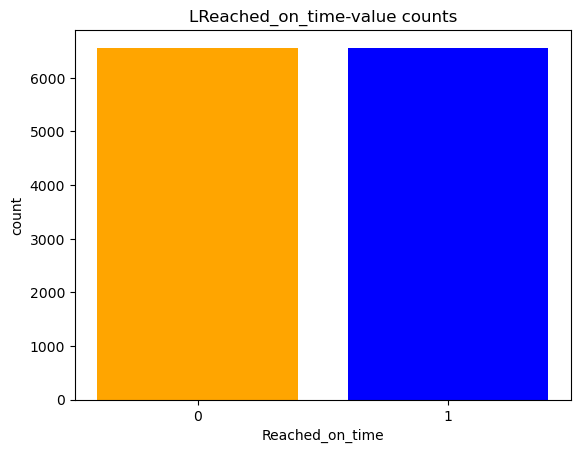

In [107]:
counts=y_sm.value_counts()
colors=['blue','orange']
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Reached_on_time')
plt.ylabel('count')
plt.title('LReached_on_time-value counts')
plt.xticks([0,1],['0','1'])
plt.show()

# Outlier Treatment

<Axes: >

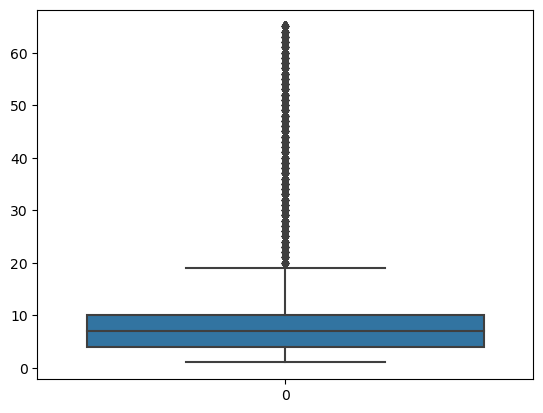

In [108]:
sns.boxplot(data1["Discount_offered"])

<Axes: xlabel='Discount_offered', ylabel='Density'>

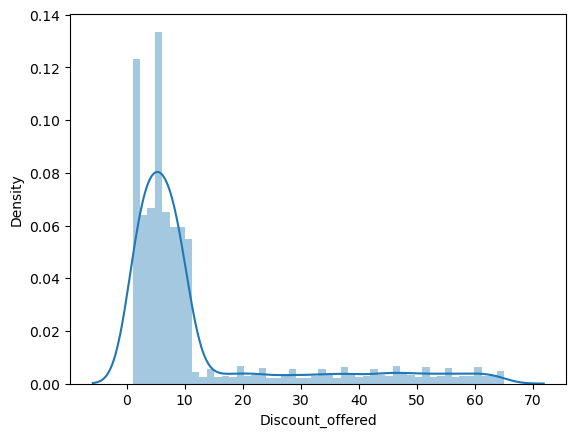

In [109]:
sns.distplot(data1["Discount_offered"])

In [110]:
IQR=data1["Discount_offered"].quantile(0.75)-data1["Discount_offered"].quantile(0.25)
IQR

6.0

In [111]:
ub1=data1["Discount_offered"].quantile(0.75)+(IQR*3)
print(ub1)

28.0


In [112]:
data1.loc[data1["Discount_offered"]>28.0,"Discount_offered"]=28.0

<Axes: xlabel='Discount_offered', ylabel='Density'>

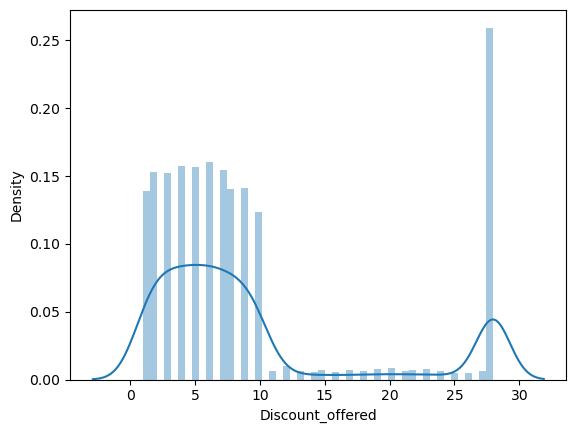

In [113]:
sns.distplot(data1["Discount_offered"])

<Axes: >

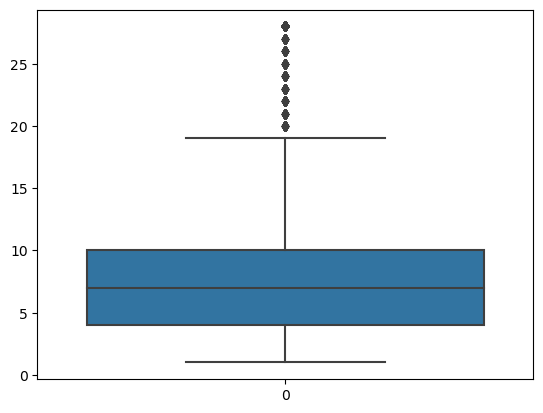

In [114]:
sns.boxplot(data1["Discount_offered"])

<Axes: >

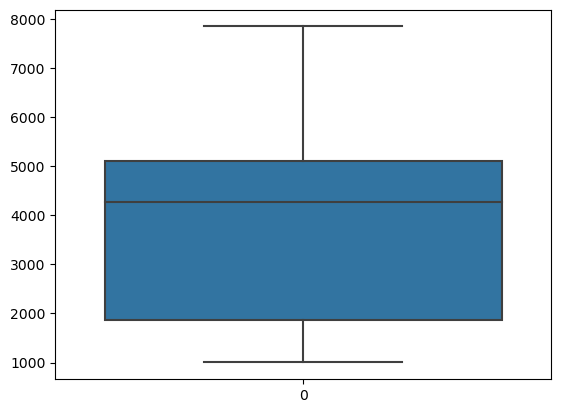

In [115]:
sns.boxplot(data1["Weight_in_gms"])

<Axes: >

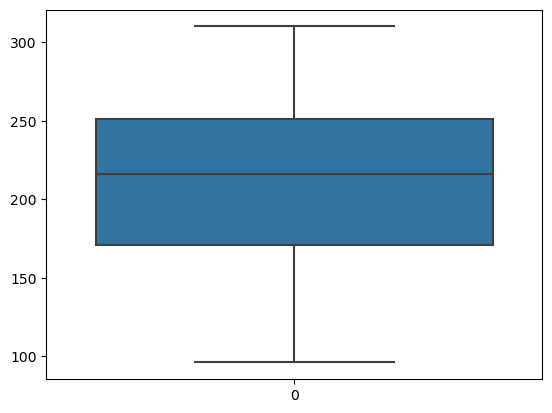

In [116]:
sns.boxplot(data1["Cost_of_the_Product"])

In [117]:
data1.skew()

Warehouse_block       -0.216572
Mode_of_Shipment      -1.032815
Customer_care_calls    0.430646
Customer_rating        0.068905
Cost_of_the_Product   -0.173065
Prior_purchases        1.662572
Product_importance    -0.326561
Gender                 0.195989
Discount_offered       1.359998
Weight_in_gms         -0.351157
Reached_on_time        0.000000
dtype: float64

In [118]:
data1["Mode_of_Shipment"]=np.sqrt(data1["Mode_of_Shipment"])
data1.skew()

Warehouse_block       -0.216572
Mode_of_Shipment      -1.460000
Customer_care_calls    0.430646
Customer_rating        0.068905
Cost_of_the_Product   -0.173065
Prior_purchases        1.662572
Product_importance    -0.326561
Gender                 0.195989
Discount_offered       1.359998
Weight_in_gms         -0.351157
Reached_on_time        0.000000
dtype: float64

In [119]:
data1["Discount_offered"]=np.cbrt(data1["Discount_offered"])
data1["Prior_purchases"]=np.cbrt(data1["Prior_purchases"])
data1.skew()

Warehouse_block       -0.216572
Mode_of_Shipment      -1.460000
Customer_care_calls    0.430646
Customer_rating        0.068905
Cost_of_the_Product   -0.173065
Prior_purchases        0.789400
Product_importance    -0.326561
Gender                 0.195989
Discount_offered       0.556267
Weight_in_gms         -0.351157
Reached_on_time        0.000000
dtype: float64

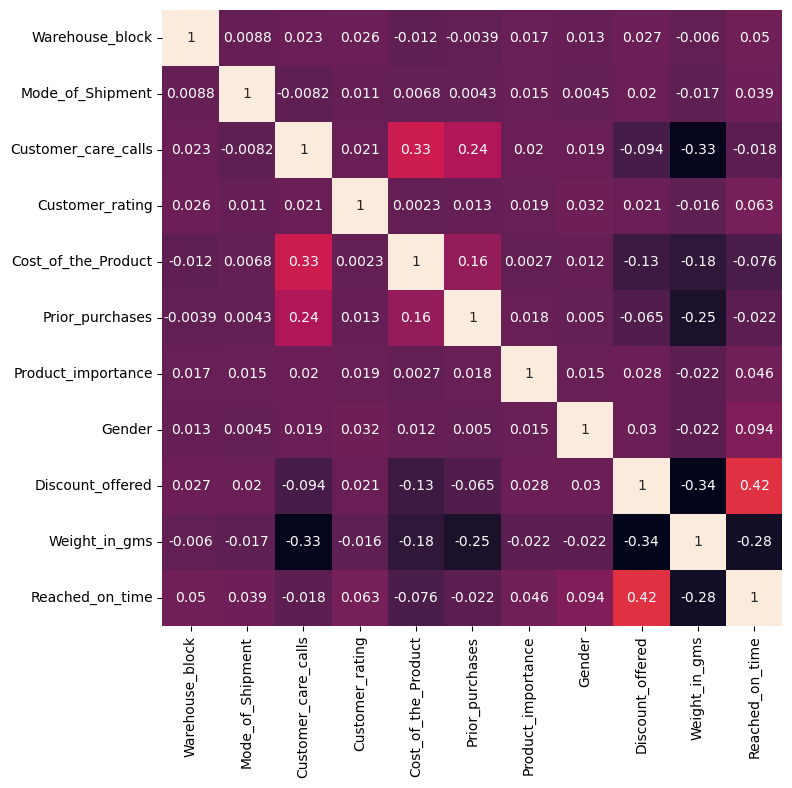

In [120]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 8)) 
sns.heatmap(data1.corr() , 
           annot=True, 
           cbar=False) 
plt.show()

In [121]:
x2=data1.iloc[:,:-1]
y2=data1.iloc[:,-1]

In [122]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [123]:
y2_train.value_counts()

Reached_on_time
0    5261
1    5239
Name: count, dtype: int64

In [124]:
y2_test.value_counts()

Reached_on_time
1    1324
0    1302
Name: count, dtype: int64

In [125]:
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((10500, 10), (2626, 10), (10500,), (2626,))

# Model Buiding

# Logistic Regression

In [126]:
lg1=LogisticRegression()
lg1.fit(x2_train,y2_train)

LogisticRegression()

In [127]:
lg_p1=lg1.predict(x2_test)
lg_p1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [128]:
pred_prob1=lg.predict_proba(x2_test)
pred_prob1

array([[0.66211522, 0.33788478],
       [0.6307181 , 0.3692819 ],
       [0.66917812, 0.33082188],
       ...,
       [0.61425502, 0.38574498],
       [0.63181809, 0.36818191],
       [0.69567948, 0.30432052]])

In [129]:
lg_m1=confusion_matrix(lg_p1,y2_test)
lg_m1

array([[973, 557],
       [329, 767]], dtype=int64)

In [130]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

66.26047220106625

In [131]:
lg_tpr1=0.562
lg_fpr1=0.423
lg_sp1=0.576
lg_pr1=0.636
lg_f11=0.601

In [132]:
print(classification_report(lg_p1,y2_test))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1530
           1       0.58      0.70      0.63      1096

    accuracy                           0.66      2626
   macro avg       0.66      0.67      0.66      2626
weighted avg       0.68      0.66      0.66      2626



In [133]:
df1=pd.DataFrame(pred_prob1)
df1

,0,1
0,0.662115,0.337885
1,0.630718,0.369282
2,0.669178,0.330822
3,0.658892,0.341108
4,0.577179,0.422821
...,...,...
2621,0.705367,0.294633
2622,0.667431,0.332569
2623,0.614255,0.385745
2624,0.631818,0.368182


In [134]:
fpr1,tpr1,threshold1=roc_curve(y2_test,df1.iloc[:,1])
fpr1

array([0.       , 0.       , 0.       , ..., 0.9984639, 0.9984639,
       1.       ])

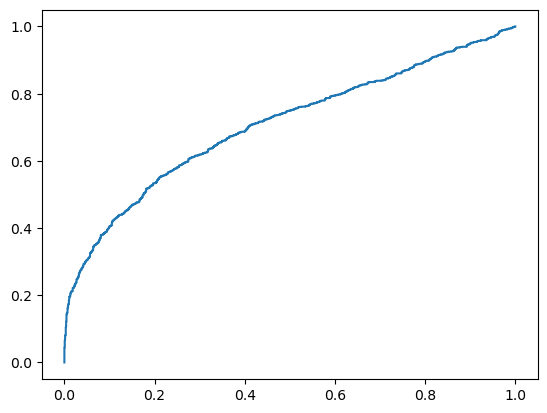

In [135]:
plt.plot(fpr1,tpr1)

In [136]:
precision1,recall1,threshold1=precision_recall_curve(y2_test,df1.iloc[:,1])

Text(0.5, 1.0, 'PRC-CURVE')

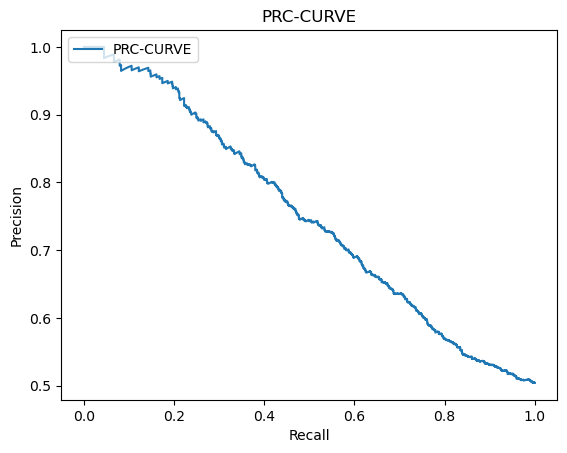

In [137]:
plt.plot(recall1,precision1,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Decision Tree

In [138]:
dt=DecisionTreeClassifier()
dt.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [139]:
dt_p1=dt.predict(x2_test)
dt_p1

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [140]:
dt_m1=confusion_matrix(dt_p1,y2_test)
dt_m1

array([[879, 420],
       [423, 904]], dtype=int64)

In [141]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

67.8979436405179

In [142]:
dt_tpr1=0.679
dt_fpr1=0.327
dt_sp1=0.672
dt_pr1=0.67
dt_f11=0.674

In [143]:
print(classification_report(dt_p1,y2_test))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1299
           1       0.68      0.68      0.68      1327

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.68      2626
weighted avg       0.68      0.68      0.68      2626



In [144]:
roc1=roc_auc_score(dt_p1,y2_test)
roc1

0.6789551176401997

In [145]:
dt_df1=pd.DataFrame(dt_p1)
dt_df1

,0
0,1
1,0
2,0
3,1
4,1
...,...
2621,1
2622,0
2623,1
2624,1


In [146]:
fpr2,tpr2,threshold2=roc_curve(y2_test,dt_df1)

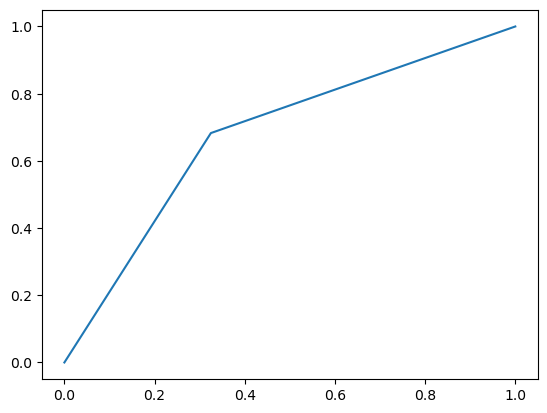

In [147]:
plt.plot(fpr2,tpr2)

In [148]:
precision2,recall2,threshold2=precision_recall_curve(y2_test,dt_df1)
precision2

array([0.50418888, 0.68123587, 1.        ])

Text(0.5, 1.0, 'PRC-CURVE')

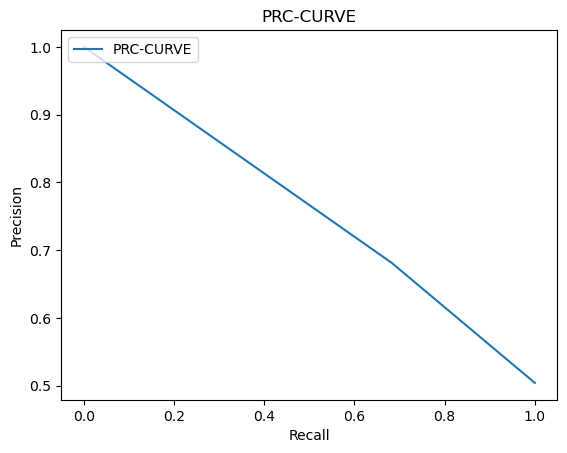

In [149]:
plt.plot(recall2,precision2,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Random Forest

In [150]:
rf=RandomForestClassifier()

In [151]:
rf.fit(x2_train,y2_train)

RandomForestClassifier()

In [152]:
rf_p1=rf.predict(x2_test)
rf_p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
rf_m1=confusion_matrix(rf_p1,y2_test)
rf_m1

array([[1111,  559],
       [ 191,  765]], dtype=int64)

In [154]:
rf_acc1=rf_m1.diagonal().sum()/rf_m1.sum()*100
rf_acc1

71.43945163747144

In [155]:
rf_tpr1=0.85
rf_fpr1=0.42
rf_sp1=0.57
rf_pr1=0.663
rf_f11=0.744

In [156]:
print(classification_report(rf_p1,y2_test))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1670
           1       0.58      0.80      0.67       956

    accuracy                           0.71      2626
   macro avg       0.72      0.73      0.71      2626
weighted avg       0.75      0.71      0.72      2626



# KNN

In [157]:
knn=KNeighborsClassifier()

In [158]:
knn.fit(x2_train,y2_train)

KNeighborsClassifier()

In [159]:
knn_p1=knn.predict(x2_test)

In [160]:
knn_m1=confusion_matrix(knn_p1,y2_test)
knn_m1

array([[1051,  515],
       [ 251,  809]], dtype=int64)

In [161]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

70.83015993907082

In [162]:
knn_tpr1=0.824
knn_fpr1=0.387
knn_sp1=0.612
knn_pr1=0.676
knn_f11=0.742

In [163]:
print(classification_report(knn_p1,y2_test))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1566
           1       0.61      0.76      0.68      1060

    accuracy                           0.71      2626
   macro avg       0.71      0.72      0.71      2626
weighted avg       0.73      0.71      0.71      2626



In [164]:
ls=list()
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x2_train,y2_train)
    p=knn.predict(x2_test)
    c=confusion_matrix(p,y2_test)
    acc=c.diagonal().sum()/c.sum()*100
    ls.append(acc)

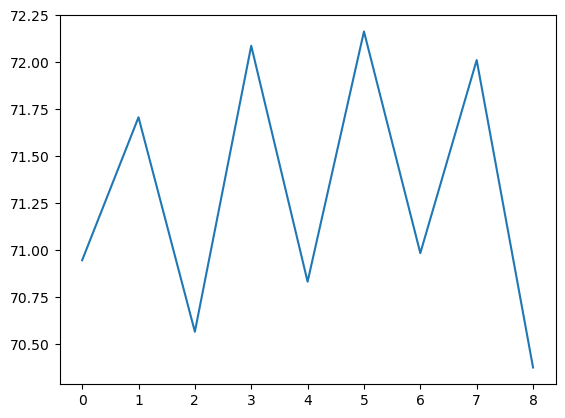

In [165]:
p1=plt.plot(ls)

# Navie Bayes

In [166]:
nb=MultinomialNB()

In [167]:
nb.fit(x2_train,y2_train)

MultinomialNB()

In [168]:
nb_p1=nb.predict(x2_test)

In [169]:
nb_m1=confusion_matrix(nb_p1,y2_test)
nb_m1

array([[948, 546],
       [354, 778]], dtype=int64)

In [170]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

65.72734196496572

In [171]:
nb_tpr1=0.728
nb_fpr1=0.412
nb_sp1=0.587
nb_pr1=0.634
nb_f11=0.677

In [172]:
print(classification_report(nb_p1,y2_test))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1494
           1       0.59      0.69      0.63      1132

    accuracy                           0.66      2626
   macro avg       0.66      0.66      0.66      2626
weighted avg       0.67      0.66      0.66      2626



# SVM

In [173]:
svc=SVC()
svc.fit(x2_train,y2_train)

SVC()

In [174]:
svc_p1=svc.predict(x2_test)

In [175]:
svc_m1=confusion_matrix(svc_p1,y2_test)
svc_m1

array([[978, 525],
       [324, 799]], dtype=int64)

In [176]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

67.66945925361767

In [177]:
print(classification_report(svc_p1,y2_test))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1503
           1       0.60      0.71      0.65      1123

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.68      2626
weighted avg       0.69      0.68      0.68      2626



In [178]:
sv_tpr1=0.758
sv_fpr1=0.399
sv_sp1=0.600
sv_pr1=0.65
sv_f11=0.70

# ADABOOST

In [179]:
adb1=AdaBoostClassifier(n_estimators=50, random_state=42)

In [180]:
adb1.fit(x2_train,y2_train)

AdaBoostClassifier(random_state=42)

In [181]:
adb_p1=adb1.predict(x2_test)

In [182]:
adb_m1=confusion_matrix(adb_p1,y2_test)
adb_m1

array([[1188,  631],
       [ 114,  693]], dtype=int64)

In [183]:
adb_acc1=adb_m1.diagonal().sum()/adb_m1.sum()*100
adb_acc1

71.62985529322164

In [184]:
adb_tpr1=0.930
adb_fpr1=0.484
adb_sp1=0.515
adb_pr1=0.654
adb_f11=0.767

In [185]:
print(classification_report(adb_p1,y2_test))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1819
           1       0.52      0.86      0.65       807

    accuracy                           0.72      2626
   macro avg       0.72      0.76      0.71      2626
weighted avg       0.79      0.72      0.73      2626



# XG Boost Classifier

In [186]:
xgb_clf = XGBClassifier(n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1e-5,
    reg_lambda=1e-5,
    random_state=42
)

In [187]:
xgb_clf.fit(x2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [188]:
xgb_p1 = xgb_clf.predict(x2_test)

In [189]:
xgb_m1=confusion_matrix(xgb_p1,y2_test)
xgb_m1

array([[1181,  618],
       [ 121,  706]], dtype=int64)

In [190]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

71.85833968012186

In [191]:
xgb_tpr1=0.905
xgb_fpr1=0.461
xgb_sp1=0.538
xgb_pr1=0.658
xgb_f11=0.761

In [192]:
print(classification_report(xgb_p1,y2_test))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1799
           1       0.53      0.85      0.66       827

    accuracy                           0.72      2626
   macro avg       0.72      0.76      0.71      2626
weighted avg       0.79      0.72      0.73      2626



In [193]:
ls1=["Logistic","Decision_tree","Random_forest","KNN", "Naive_bayes","SVM","ADA Boost","XG Boost"]
ls2=[lg_acc1,dt_acc1,rf_acc1, knn_acc1, nb_acc1,svc_acc1,adb_acc1,xgb_acc1]
ls3=[lg_tpr1,dt_tpr1,rf_tpr1, knn_tpr1, nb_tpr1, sv_tpr1,adb_tpr1,xgb_tpr1]
ls4=[lg_fpr1,dt_fpr1,rf_fpr1, knn_fpr1, nb_fpr1, sv_fpr1,adb_fpr1,xgb_fpr1]
ls5=[lg_sp1,dt_sp1,rf_sp1, knn_sp1, nb_sp1, sv_sp1,adb_sp1,xgb_sp1]
ls6=[lg_pr1,dt_pr1,rf_pr1, knn_pr1, nb_pr1, sv_pr1,adb_pr1,xgb_pr1]
ls7=[lg_f11,dt_f11,rf_f11, knn_f11, nb_f11, sv_f11,adb_f11,xgb_f11]

In [194]:
df2=pd.DataFrame({"Modelname":ls1,"Accuracy":ls2,"TPR":ls3,"FPR":ls4, "Specificity":ls5,"Precision":ls6,"F1-score":ls7})
df2

,Modelname,Accuracy,TPR,FPR,Specificity,Precision,F1-score
0,Logistic,66.260472,0.562,0.423,0.576,0.636,0.601
1,Decision_tree,67.897944,0.679,0.327,0.672,0.670,0.674
2,Random_forest,71.439452,0.850,0.420,0.570,0.663,0.744
3,KNN,70.830160,0.824,0.387,0.612,0.676,0.742
4,Naive_bayes,65.727342,0.728,0.412,0.587,0.634,0.677
5,SVM,67.669459,0.758,0.399,0.600,0.650,0.700
6,ADA Boost,71.629855,0.930,0.484,0.515,0.654,0.767
7,XG Boost,71.858340,0.905,0.461,0.538,0.658,0.761


# Feature Selection

In [195]:
feature_importance = xgb_clf.feature_importances_
feature_importance

array([0.0385258 , 0.04583249, 0.03462737, 0.03554199, 0.04418327,
       0.07266874, 0.03727571, 0.05282706, 0.5682369 , 0.07028069],
      dtype=float32)

In [196]:
from sklearn.feature_selection import mutual_info_classif

In [197]:
mutual_info = mutual_info_classif(x2_train,y2_train)
mutual_info

array([0.        , 0.00982476, 0.00511389, 0.00420977, 0.00203385,
       0.01411584, 0.01122908, 0.00091154, 0.17097262, 0.15248732])

In [198]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x2_train.columns
mutual_info.sort_values(ascending=False)

Discount_offered       0.170973
Weight_in_gms          0.152487
Prior_purchases        0.014116
Product_importance     0.011229
Mode_of_Shipment       0.009825
Customer_care_calls    0.005114
Customer_rating        0.004210
Cost_of_the_Product    0.002034
Gender                 0.000912
Warehouse_block        0.000000
dtype: float64

In [199]:
from sklearn.feature_selection import SelectKBest

In [200]:
sel_top_cols=SelectKBest(mutual_info_classif,k=7)
sel_top_cols.fit(x2_train,y2_train)
x2_train.columns[sel_top_cols.get_support()]

Index(['Warehouse_block', 'Mode_of_Shipment', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms'],
      dtype='object')

In [201]:
# Transform the training and testing data to include only the selected top features
X_train_selected = sel_top_cols.transform(x2_train)
X_test_selected = sel_top_cols.transform(x2_test)

# Optionally, you can scale the selected features for better model performance
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Now you can continue with training your model using the selected features
# For example, if you're using XGBoost:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBClassifier
xgb_clf_selected = XGBClassifier(n_estimators=100,
                                 max_depth=5,
                                 learning_rate=0.1,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 reg_alpha=1e-5,
                                 reg_lambda=1e-5,
                                 random_state=42)

# Fit XGBClassifier to the selected and scaled training data
xgb_clf_selected.fit(X_train_selected_scaled, y2_train)

# Make predictions on the test set using the model with selected features
y_pred_selected = xgb_clf_selected.predict(X_test_selected_scaled)

# Evaluate the model performance
accuracy_selected = accuracy_score(y2_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected*100)

Accuracy with selected features: 72.96268088347297


In [202]:
fs_m1=confusion_matrix(y_pred_selected,y2_test)
fs_m1

array([[1217,  625],
       [  85,  699]], dtype=int64)

In [203]:
print(classification_report(y_pred_selected,y2_test))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1842
           1       0.53      0.89      0.66       784

    accuracy                           0.73      2626
   macro avg       0.73      0.78      0.72      2626
weighted avg       0.81      0.73      0.74      2626



In [204]:
acc=accuracy_selected*100
tpr=0.92
fpr=0.46
spe=0.53
precis=0.66
f1=0.768

In [205]:
ls1=["Logistic","Decision_tree","Random_forest","KNN", "Naive_bayes","SVM","ADA Boost","XG Boost","Feature Selection"]
ls2=[lg_acc1,dt_acc1,rf_acc1, knn_acc1, nb_acc1,svc_acc1,adb_acc1,xgb_acc1,acc]
ls3=[lg_tpr1,dt_tpr1,rf_tpr1, knn_tpr1, nb_tpr1, sv_tpr1,adb_tpr1,xgb_tpr1,tpr]
ls4=[lg_fpr1,dt_fpr1,rf_fpr1, knn_fpr1, nb_fpr1, sv_fpr1,adb_fpr1,xgb_fpr1,fpr]
ls5=[lg_sp1,dt_sp1,rf_sp1, knn_sp1, nb_sp1, sv_sp1,adb_sp1,xgb_sp1,spe]
ls6=[lg_pr1,dt_pr1,rf_pr1, knn_pr1, nb_pr1, sv_pr1,adb_pr1,xgb_pr1,precis]
ls7=[lg_f11,dt_f11,rf_f11, knn_f11, nb_f11, sv_f11,adb_f11,xgb_f11,f1]

In [206]:
df3=pd.DataFrame({"Modelname":ls1,"Accuracy":ls2,"TPR":ls3,"FPR":ls4, "Specificity":ls5,"Precision":ls6,"F1-score":ls7})
df3

,Modelname,Accuracy,TPR,FPR,Specificity,Precision,F1-score
0,Logistic,66.260472,0.562,0.423,0.576,0.636,0.601
1,Decision_tree,67.897944,0.679,0.327,0.672,0.670,0.674
2,Random_forest,71.439452,0.850,0.420,0.570,0.663,0.744
3,KNN,70.830160,0.824,0.387,0.612,0.676,0.742
4,Naive_bayes,65.727342,0.728,0.412,0.587,0.634,0.677
5,SVM,67.669459,0.758,0.399,0.600,0.650,0.700
6,ADA Boost,71.629855,0.930,0.484,0.515,0.654,0.767
7,XG Boost,71.858340,0.905,0.461,0.538,0.658,0.761
8,Feature Selection,72.962681,0.920,0.460,0.530,0.660,0.768
